### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [18]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [19]:
import tensorflow as tf
tf.__version__

'2.0.0'

> + Using the latest version of tensorflow

#### Collect Fashion mnist data from tf.keras.datasets 

In [20]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [21]:
print('Training set feature shape - ',x_train.shape)
print('Training set target shape  - ',y_train.shape)
print('Test set feature shape     - ',x_test.shape)
print('Test set target shape      - ',y_test.shape)

Training set feature shape -  (60000, 28, 28)
Training set target shape  -  (60000,)
Test set feature shape     -  (10000, 28, 28)
Test set target shape      -  (10000,)


#### Change train and test labels into one-hot vectors

In [22]:
#Convert labels to one hot encoding
y_train_1 = tf.keras.utils.to_categorical(y_train)

In [23]:
y_train[0]

9

In [24]:
y_train_1[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [25]:
y_test_1 = tf.keras.utils.to_categorical(y_test)

In [26]:
y_test[0]

9

In [27]:
y_test_1[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Build the Graph

In [28]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

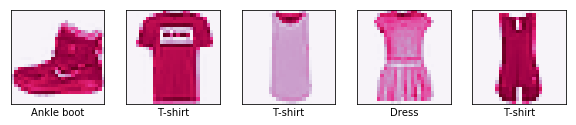

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='PuRd')
    plt.xlabel(class_names[y_train[i]])
plt.show()

#### Initialize model, reshape & normalize data

In [30]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

### Normalize both the train and test image data from 0-255 to 0-1

In [31]:
x_train_1 = x_train/255
x_test_1 = x_test/255

### Initializing the model and reshaping data.

In [32]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshaping the data from 28x28(2D) to 784(1D) to match input dimensions in Conv2D layer in keras
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [33]:
#Add first convolutional layer
model.add(tf.keras.layers.Dense(200,                                      # Number of Neurons
                                activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Dense(100,                                      # Number of Neurons
                                activation='relu'))

### Add dropout layer with `p=0.25`

In [34]:
model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

#### Output layer

In [35]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [36]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [38]:
x_train_1[59999]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
x_test_1[9999]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [40]:
y_train_1

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
y_test_1[9999]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [42]:
model.fit(x_train_1,y_train_1,          
          validation_data=(x_test_1,y_test_1),
          epochs=10,
         batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.5146 - accuracy: 0.8151 - val_loss: 0.4121 - val_accuracy: 0.8491
Epoch 2/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.3829 - accuracy: 0.8604 - val_loss: 0.4035 - val_accuracy: 0.8527
Epoch 3/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3486 - accuracy: 0.8721 - val_loss: 0.3608 - val_accuracy: 0.8713
Epoch 4/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3237 - accuracy: 0.8814 - val_loss: 0.3629 - val_accuracy: 0.8675
Epoch 5/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3062 - accuracy: 0.8874 - val_loss: 0.3538 - val_accuracy: 0.8721
Epoch 6/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2912 - accuracy: 0.8917 - val_loss: 0.3828 - val_accuracy: 0.8647
Epoch 7/10
60000/60000 [=========================

In [49]:
scores = model.evaluate(x_test_1, y_test_1)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [47]:
model.predict_proba(x_test_1, batch_size=32, verbose=0)

array([[8.4899665e-10, 1.9706472e-09, 8.1513156e-12, ..., 2.3950916e-04,
        9.4722126e-11, 9.9973959e-01],
       [2.9614145e-07, 3.2437492e-16, 9.9624121e-01, ..., 1.8724531e-31,
        1.1409438e-12, 7.6192715e-30],
       [4.2223830e-14, 1.0000000e+00, 2.6048817e-20, ..., 1.8893724e-32,
        1.5708488e-19, 1.0419161e-30],
       ...,
       [8.7210179e-07, 2.5284456e-12, 1.7979564e-05, ..., 1.6974389e-10,
        9.9995089e-01, 6.0973428e-17],
       [5.5178084e-12, 1.0000000e+00, 3.2853794e-18, ..., 2.3384369e-24,
        2.8219668e-14, 2.2218753e-22],
       [1.9330535e-07, 8.8263216e-11, 1.9570981e-08, ..., 5.9598230e-04,
        1.5457772e-04, 1.7174260e-06]], dtype=float32)

### Loss Value and Accuracy value for Test set

In [70]:
(model.metrics_names,scores)

(['loss', 'accuracy'], [0.33703298259973524, 0.8822])

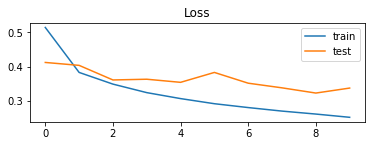

In [62]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='test')
plt.legend()

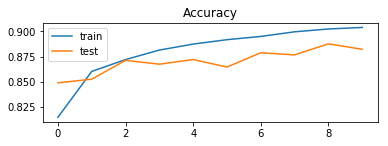

In [63]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(model.history.history['accuracy'], label='train')
plt.plot(model.history.history['val_accuracy'], label='test')
plt.legend()
plt.show()